# 02.Neural Network classification
* https://www.learnpytorch.io/02_pytorch_classification/

## 1.0 Make classification data and get it ready

In [9]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [ ]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0
5 -0.479646  0.676435      1
6 -0.013648  0.803349      1
7  0.771513  0.147760      1
8 -0.169322 -0.793456      1
9 -0.121486  1.021509      0

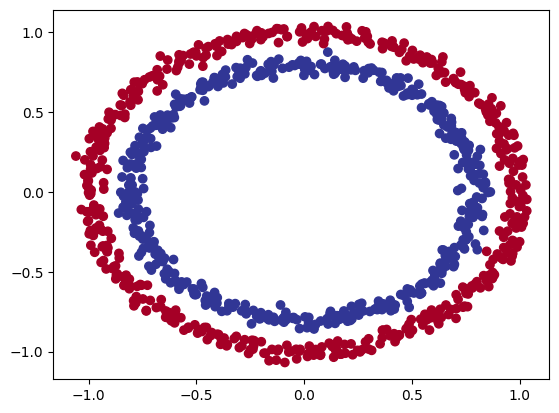

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


#### วิเคราะห์กราฟแบบกระจาย: สรุปสั้นๆ

**กราฟนี้แสดงความสัมพันธ์ระหว่างตัวแปร `X` และ `Y`** โดยใช้สีเพื่อแสดงค่าของตัวแปร `Z` เพิ่มเติม

**ข้อมูล:**

* `X` และ `Y` มีความสัมพันธ์กัน (ค่า `X` เพิ่มขึ้น ค่า `Y` ก็มีแนวโน้มเพิ่มขึ้น)
* `Z` แสดงค่าเพิ่มเติม  สีแดงหมายถึงค่าสูง สีน้ำเงินหมายถึงค่าต่ำ

**การวิเคราะห์:**

* จุดสีแดงและสีน้ำเงินกระจุกตัวไม่สม่ำเสมอ  อาจมีค่าผิดปกติหรือข้อมูลกระจุกตัว
* สีไม่ได้แสดงถึงความสัมพันธ์เชิงเส้น  ต้องวิเคราะห์ข้อมูลเพิ่มเติม



###1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.3.0+cu121'

In [ ]:
type(X),X.dtype #check type of X

(numpy.ndarray, dtype('float64'))

In [ ]:
#convert data in to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
#split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,#20% test, 80% train
                                                    random_state=42)

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

##  2.Building a model
Let'build a model to classify our **blue** and **red** dot

step to setup

1.setup device

2.construct a model(by subclass `nn.Module`)

3.define a loss function and optim

4.create a reaning and test loop




In [ ]:
# 1.import pyTorch and nn
import torch
from torch import nn

# 2.setup device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Let's create a model class that:

* Subclasses (almost all PyTorch models are subclasses of ).nn.Modulenn.Module

* Creates 2 layers in the constructor capable of handling the input and output shapes of and .nn.LinearXy

* Defines a method containing the forward pass computation of the model.forward()

* Instantiates the model class and sends it to the target .device

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [ ]:
# 3.create a model(by subclass nn.Module)
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
        # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Replicate CircleModelV0 with nn.Sequential เหมือนด้านบนและสั้นกว่า
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

### อธิบายการตั้งค่า in_features และ out_features ใน `nn.Linear`
**คำอธิบาย:**

- `in_features`: กำหนดจำนวน **คอลัมน์** ของข้อมูล **อินพุต** ที่เลเยอร์นั้นจะรับ
    - ในตัวอย่างนี้ `in_features=2` หมายความว่าเลเยอร์ `layer_1` จะรับข้อมูลอินพุตที่มี **สองคอลัมน์**
    - ข้อมูลอินพุตสำหรับ `layer_1` น่าจะมาจาก `X_train` ซึ่งมีขนาด `(800, 2)` หมายความว่ามี 800 แถว (ตัวอย่าง) และ 2 คอลัมน์ (ฟีเจอร์)
- `out_features`: กำหนดจำนวน **คอลัมน์** ของข้อมูล **เอาต์พุต** ที่เลเยอร์นั้นจะสร้าง
    - ในตัวอย่างนี้ `out_features=5` หมายความว่า `layer_1` จะสร้างข้อมูลเอาต์พุตที่มี **ห้าคอลัมน์**
    - ข้อมูลเอาต์พุตของ `layer_1` จะเป็นข้อมูลอินพุตสำหรับ `layer_2`
    - `layer_2` มี `in_features=5` เพราะว่า `out_features` ของ `layer_1` คือ 5
    - `layer_2` มี `out_features=1` เพราะข้อมูลเอาต์พุตสุดท้ายของโมเดลนี้ต้องการเป็นค่าสเกลาร์ (0 หรือ 1)

**สรุป:**

- `in_features`: กำหนดจำนวนฟีเจอร์ **อินพุต**
- `out_features`: กำหนดจำนวนฟีเจอร์ **เอาต์พุต**




ตัวอย่างภาพที่ตรงกับข้อมูลนี้
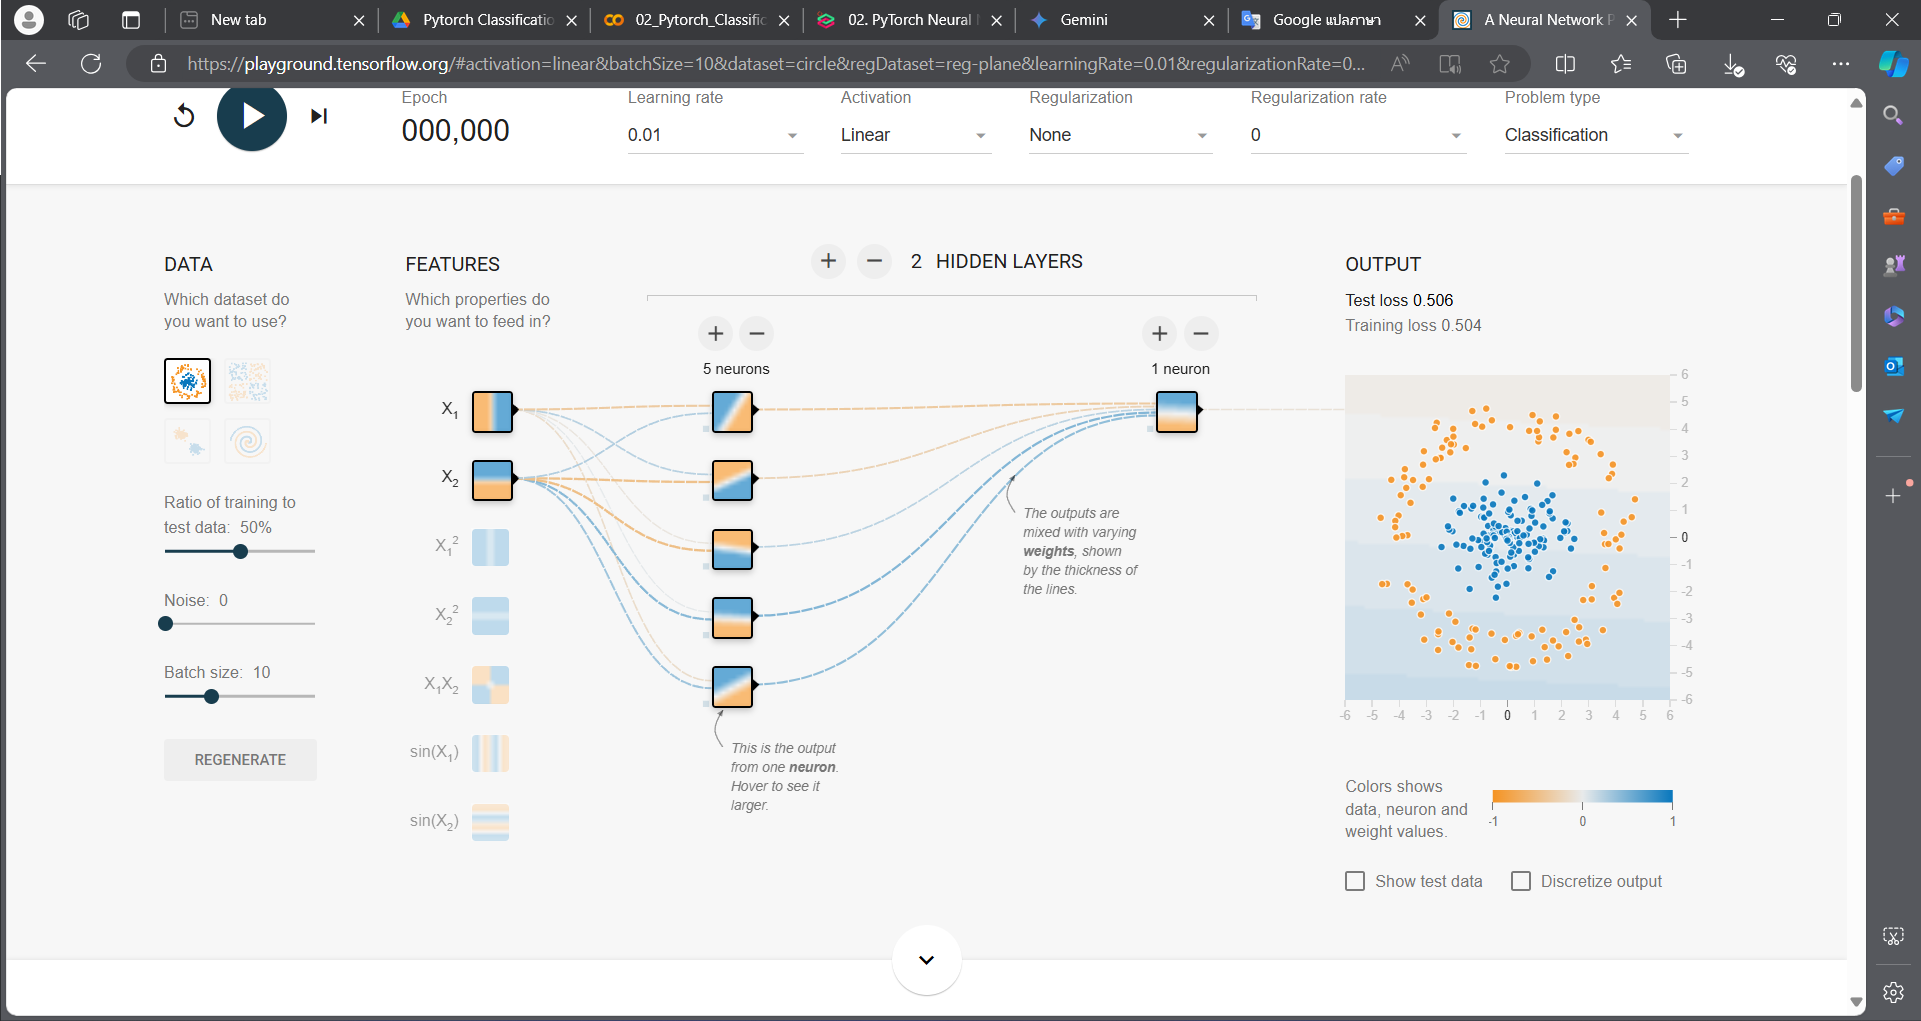
- https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=5,1&seed=0.96990&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
model_0.state_dict()


OrderedDict([('0.weight',
              tensor([[-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427],
                      [ 0.1554,  0.0910]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6231,  0.2968, -0.1061, -0.3239,  0.6074], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0997, -0.2474, -0.2264, -0.0214,  0.2497]], device='cuda:0')),
             ('1.bias', tensor([-0.1143], device='cuda:0'))])

In [ ]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")
#โมเดลนี้มีความแม่นยำแค่ 50-60% จำเป็นต้องแก้ไข

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.1415],
        [-0.1357],
        [-0.0911],
        [-0.1561],
        [ 0.0132],
        [ 0.0160],
        [-0.0502],
        [-0.0144],
        [-0.0956],
        [-0.1341]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracywhat percentage right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

##  3.Training a model
1. Forward pass to make predictions on data - also called forward propagation
2. Calculate the loss (
3. Optimizer zero grad
4. Loss backward (**backpropagation**)
5. Optimizer (**gradient descent**)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels
Our model outputs are going to be raw logits.

We can convert these logits into prediction probabilities by passing them to some kind of activation function (e.g. classification[link text](https://) and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the `argmax`

In [ ]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1415],
        [-0.1357],
        [-0.0911],
        [-0.1561],
        [ 0.0132]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
#use the sigmoid function
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4647],
        [0.4661],
        [0.4772],
        [0.4611],
        [0.5033]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [ ]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

### อธิบายเกี่ยวกับการทำงานของการคำนวณคาดการณ์ของโมเดลใน PyTorch:

### โค้ด:
```python
# สมมุติว่าคุณมี logits ของการคาดการณ์จากโมเดล
y_pred_probs = torch.sigmoid(y_logits)  # แปลง logits เป็นความน่าจะเป็นด้วย sigmoid
y_pred_probs

# หาค่าผลลัพธ์ที่คาดการณ์ (ทำการปัดเศษค่าความน่าจะเป็น)
y_preds = torch.round(y_pred_probs)

# แบบเต็ม (ใช้งานโมเดลเพื่อคาดการณ์บน X_test)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# ตรวจสอบว่าค่าที่คาดการณ์เท่ากันหรือไม่
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# กำจัดมิติที่ไม่จำเป็น
y_preds.squeeze()
```

### อธิบาย:
1. **`torch.sigmoid(y_logits)`**:
   - ใช้ฟังก์ชัน sigmoid เพื่อแปลง logits ให้เป็นความน่าจะเป็นที่อยู่ในช่วง 0 ถึง 1

2. **`torch.round(y_pred_probs)`**:
   - ทำการปัดเศษค่าความน่าจะเป็นเพื่อให้ได้ค่า 0 หรือ 1 ซึ่งเป็นค่าผลลัพธ์ที่คาดการณ์ (labels)

3. **`torch.sigmoid(model_0(X_test.to(device))[:5])`**:
   - ใช้โมเดล (`model_0`) ทำการคาดการณ์ logits บนชุดข้อมูลทดสอบ (`X_test`)
   - แปลง logits เป็นความน่าจะเป็นด้วย sigmoid
   - เลือกเอาค่าคาดการณ์ 5 ตัวแรก

4. **`torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))`**:
   - ทำการปัดเศษค่าความน่าจะเป็นที่ได้จากโมเดลเพื่อให้ได้ค่าผลลัพธ์ที่คาดการณ์ (labels)

5. **`torch.eq(y_preds.squeeze(), y_pred_labels.squeeze())`**:
   - ตรวจสอบว่าค่าผลลัพธ์ที่คาดการณ์สองชุดนี้เท่ากันหรือไม่ โดยการเปรียบเทียบแต่ละองค์ประกอบ

6. **`y_preds.squeeze()`**:
   - กำจัดมิติที่ไม่จำเป็นออกจาก `y_preds` (เช่น ถ้า `y_preds` มีขนาด [N, 1] จะถูกแปลงเป็น [N])

### สรุป:
- โค้ดนี้แปลง logits ที่คาดการณ์เป็นความน่าจะเป็น จากนั้นปัดเศษเพื่อให้ได้ค่าผลลัพธ์เป็น 0 หรือ 1
- ใช้โมเดลทำการคาดการณ์บนชุดข้อมูลทดสอบ และเปรียบเทียบค่าผลลัพธ์ที่ได้เพื่อดูว่าค่าที่คาดการณ์เท่ากันหรือไม่
- กำจัดมิติที่ไม่จำเป็นออกจากค่าที่คาดการณ์

หวังว่าจะช่วยให้คุณเข้าใจมากขึ้นครับ!

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
#set number epoch
epochs = 100
# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs) :
  # Training
  model_0.train()
  # 1.Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # 2. calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  # 3.optim
  optimizer.zero_grad()
  # 4. Loss backward
  loss.backward()
  # 5. Optim step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode() :
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                  y_test)
    test_acc = accuracy_fn(y_true=y_test,
                      y_pred=test_pred)
    # print out
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69443, Accuracy: 45.00% | Test loss: 0.69336, Test acc: 45.50%
Epoch: 10 | Loss: 0.69395, Accuracy: 47.38% | Test loss: 0.69309, Test acc: 48.00%
Epoch: 20 | Loss: 0.69367, Accuracy: 48.00% | Test loss: 0.69302, Test acc: 48.50%
Epoch: 30 | Loss: 0.69349, Accuracy: 48.38% | Test loss: 0.69303, Test acc: 47.00%
Epoch: 40 | Loss: 0.69337, Accuracy: 48.38% | Test loss: 0.69308, Test acc: 47.50%
Epoch: 50 | Loss: 0.69328, Accuracy: 49.00% | Test loss: 0.69316, Test acc: 46.00%
Epoch: 60 | Loss: 0.69321, Accuracy: 49.62% | Test loss: 0.69324, Test acc: 45.00%
Epoch: 70 | Loss: 0.69316, Accuracy: 49.38% | Test loss: 0.69332, Test acc: 43.50%
Epoch: 80 | Loss: 0.69313, Accuracy: 48.62% | Test loss: 0.69340, Test acc: 49.00%
Epoch: 90 | Loss: 0.69310, Accuracy: 48.62% | Test loss: 0.69347, Test acc: 48.50%


##4.Make predictions and evaluate the model
From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()`-https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py.

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


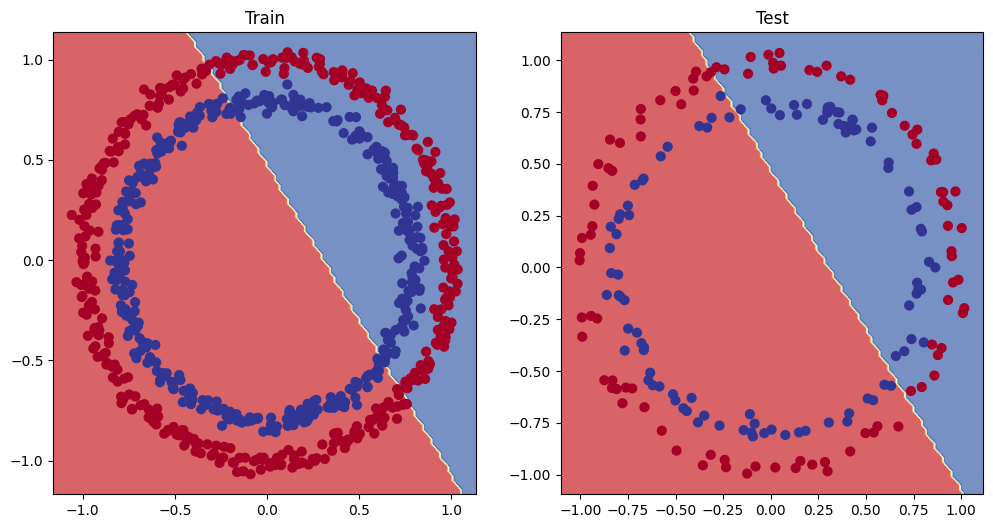

In [ ]:
# Plot decision boundaries for training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

อธิบายการดูข้อมูล : https://chatgpt.com/c/d2adf424-41ae-4c5b-887b-e66fbd911e03

##5.Improving a model (from a model perspective)
Let's try to fix our model's underfitting problem.

Focusing specifically on the model (not the data), there are a few ways we could do this.
* Add more layers	layers
* Add more hidden units
* Fit for longer
* changing the activation function
* change the loss function


try to improvr model by:
* add hidden units 5 -> 10
* increase the number of layers 2 -> 3
* increase the number epochs 100 -> 1000

In [ ]:
X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
      #แบบยาวเข้าใจง่าย
      # z = self.layer_1(x)
      # z = self.layer_2(z)
      # z = self.layer_3(z)
       # return z
      return self.layer_3(self.layer_2(self.layer_1(x))) #แบบสั้นและเร็วกว่า

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
#set number epoch
epochs = 1000
# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs) :
  # Training
  model_1.train()
  # 1.Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # 2. calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  # 3.optim
  optimizer.zero_grad()
  # 4. Loss backward
  loss.backward()
  # 5. Optim step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode() :
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                  y_test)
    test_acc = accuracy_fn(y_true=y_test,
                      y_pred=test_pred)
    # print out
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


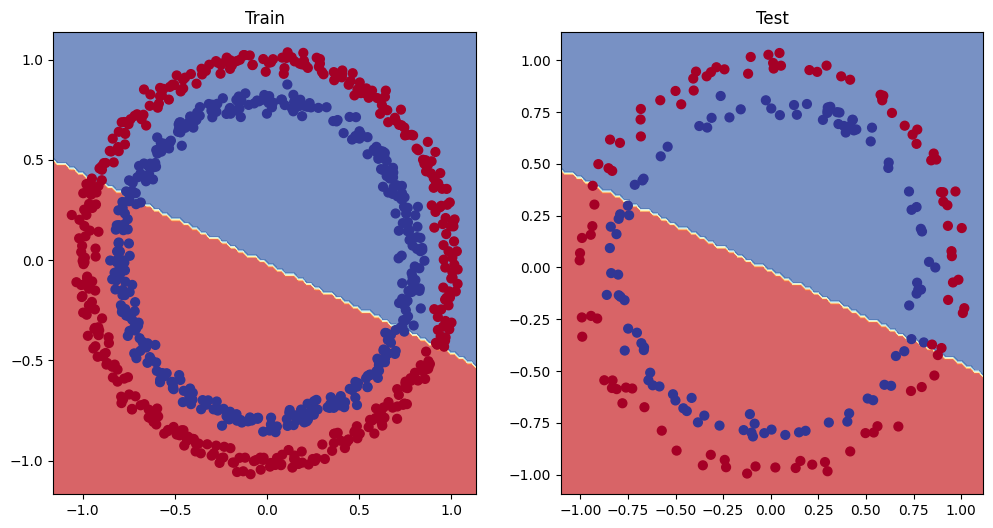

In [ ]:
# Plot decision boundaries for training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)


###5.1 Preparing data to see if our model can model a straight line

In [ ]:
# Create weight and bias using the linear regression formula `(y = weight * X + bias).`
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.01

# Create X and y (features and labels)
X_regression = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y_regression = weight * X_regression + bias
X_regression[:5], y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set, 20% for testing
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

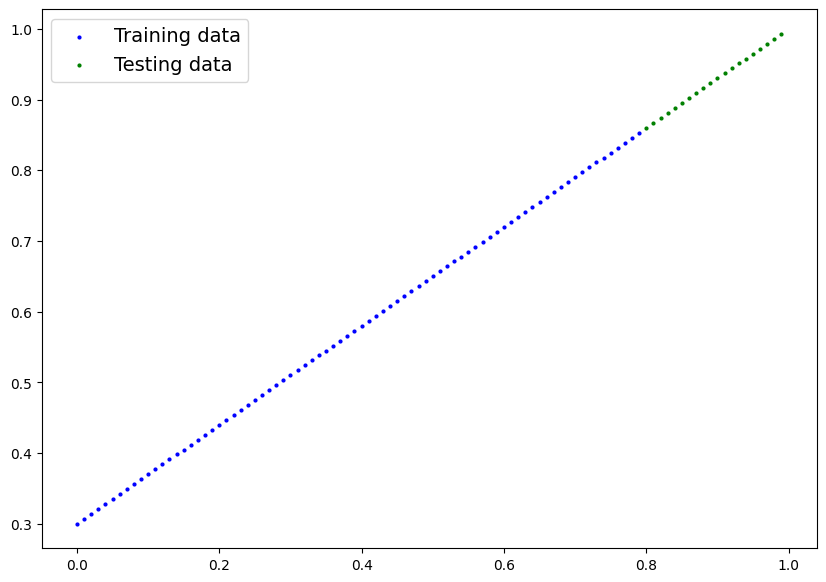

In [ ]:
plot_predictions(train_data=X_train_regression,
                    train_labels=y_train_regression,
                    test_data=X_test_regression,
                    test_labels=y_test_regression,
                    predictions=None);


###5.2 Adjusting model_1 to fit a straight line
Now we've got some data, let's recreate model_1 but with a loss function suited to our regression data.

In [ ]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)



In [ ]:
#epoch is one loop through the data..
torch.manual_seed(42)
epochs = 1000
# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train_regression = X_train_regression.to(device)
X_test_regression = X_test_regression.to(device)
y_train_regression = y_train_regression.to(device)
y_test_regression = y_test_regression.to(device)

#0. Loop through the data
for epoch in range(epochs):
  # set model to training mode
  model_2.train()
  # 1. Forward pass
  y_pred = model_2(X_train_regression)
  # 2. Create the loss function
  loss = loss_fn(y_pred, y_train_regression)
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Preform backpropagation on the loss with respect to the parameters of the model
  # สร้าง backpropagation ล่วงหน้าเมื่อสูญเสียโดยคำนึงถึงพารามิเตอร์ของโมเดล
  loss.backward()
  # 5. Optimizer step
  optimizer.step()

  model_2.eval() #คำสั่ง ไม่เปลียนค่าและบันทึกต่างๆในโมเดลต้นแบบ ใช้เพื่อทดสอบการเรียนรู้และแสดงผลโดยไม่ส่งผลกระทบกับรุ่นต้นแบบ
  with torch.inference_mode():
    # 1. Forward pass on test data
    test_pred = model_2(X_test_regression)

    # 2. Caculate loss on test data
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
        # epoch_count.append(epoch)
        # train_loss_values.append(loss.detach().numpy())
        # test_loss_values.append(test_loss.detach().numpy())
  # Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Train loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Train loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Train loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Train loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Train loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Train loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Train loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Train loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Train loss: 0.01798 | Test loss: 0.00360


In [ ]:
model_2.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.7474],
                      [ 0.8386],
                      [-0.2685],
                      [ 0.9277],
                      [-0.2253],
                      [ 0.2219],
                      [-0.5157],
                      [ 0.5984],
                      [ 0.8952],
                      [-0.7398]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.8181,  0.1893,  0.6798,  0.1390,  0.4719, -0.1165,  0.7276,  0.1469,
                      -0.4521,  0.2444], device='cuda:0')),
             ('1.weight',
              tensor([[-6.8272e-02,  4.0207e-03, -9.4606e-02,  2.5110e-01, -2.2979e-01,
                       -1.4690e-01, -6.2611e-02, -1.6088e-01,  3.5127e-02, -3.2492e-01],
                      [ 3.0631e-01, -2.5446e-01,  2.4940e-01,  6.7609e-02, -1.0098e-01,
                        1.9585e-01,  5.0876e-02,  2.6490e-01,  4.2846e-02, -1.0855e-01],
                      [ 8.2267e-03, -1.2545e-01,  9.8334e-02,  2.4

In [ ]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)
y_preds[:10], y[:10]


(tensor([[0.8246],
         [0.8312],
         [0.8377],
         [0.8443],
         [0.8509],
         [0.8574],
         [0.8640],
         [0.8706],
         [0.8771],
         [0.8837]], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

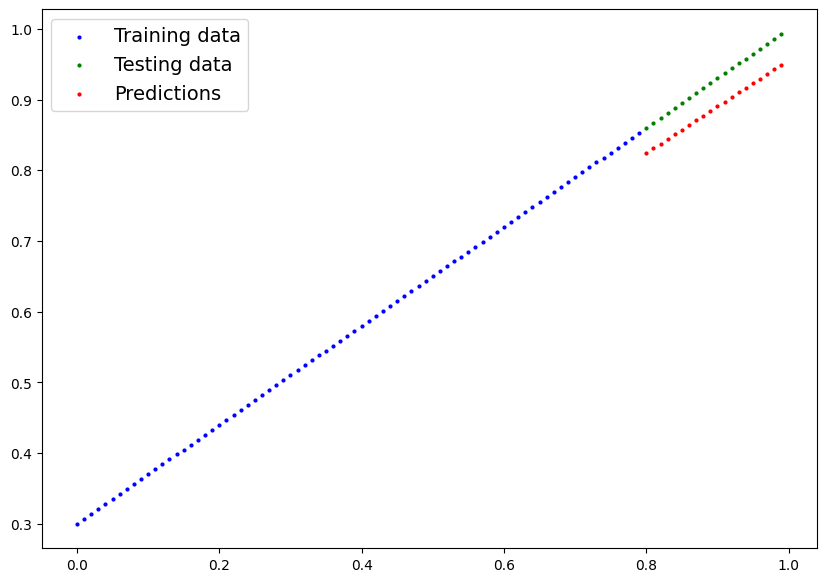

In [ ]:
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

##6.The missing piece : non - lineariy
We've seen our model can draw straight (linear) lines, thanks to its linear layers.

เราได้เห็นแล้วว่าโมเดลของเราสามารถวาดเส้นตรง (เชิงเส้น) ได้ ต้องขอบคุณเลเยอร์เชิงเส้นของมัน

But how about we give it the capacity to draw non-straight (non-linear) lines?

แต่เราจะให้ความสามารถในการวาดเส้นไม่ตรง (ไม่ใช่เชิงเส้น) ได้อย่างไร?

มาหาคำตอบกัน

###6.1 Recreating non-linear data (red and blue circles)

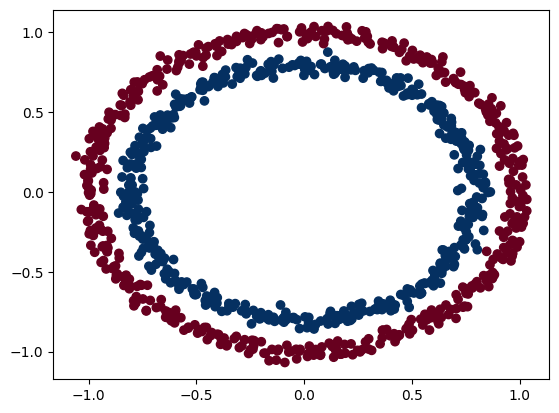

In [ ]:
#Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples = 1000

X,y = make_circles(n_samples=1000,
                   noise = 0.03,
                   random_state=42,)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [ ]:
#convert data to tensors and then train and splits
import torch
import numpy as np
from sklearn.model_selection import train_test_split
#convert data in to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,#20% test, 80% train
                                                    random_state=42)

X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

###6.2 Building a model with non-linearity


*   Linear = straight linear
*   Non-line = non-straight lines



In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
      #แบบยาวเข้าใจง่าย
      # z = self.layer_1(x)
      # z = self.layer_2(z)
      # z = self.layer_3(z)
       # return z
      return self.layer_3(self.relu(self.layer_2(self.layer_1(x)))) #แบบสั้นและเร็วกว่า

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

###6.3 Training a model with non-linearity

In [ ]:
#set up loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
#set number epoch
epochs = 2000
# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs) :
  # Training
  model_3.train()
  # 1.Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # 2. calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  # 3.optim
  optimizer.zero_grad()
  # 4. Loss backward
  loss.backward()
  # 5. Optim step
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode() :
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                  y_test)
    test_acc = accuracy_fn(y_true=y_test,
                      y_pred=test_pred)
    # print out
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69833, Accuracy: 50.00% | Test loss: 0.69863, Test acc: 49.00%
Epoch: 100 | Loss: 0.69289, Accuracy: 50.88% | Test loss: 0.69411, Test acc: 47.00%
Epoch: 200 | Loss: 0.69015, Accuracy: 53.37% | Test loss: 0.69141, Test acc: 50.00%
Epoch: 300 | Loss: 0.68762, Accuracy: 56.62% | Test loss: 0.68828, Test acc: 55.00%
Epoch: 400 | Loss: 0.68469, Accuracy: 60.00% | Test loss: 0.68469, Test acc: 61.00%
Epoch: 500 | Loss: 0.67985, Accuracy: 56.00% | Test loss: 0.67890, Test acc: 60.50%
Epoch: 600 | Loss: 0.67280, Accuracy: 56.00% | Test loss: 0.67176, Test acc: 60.50%
Epoch: 700 | Loss: 0.66304, Accuracy: 64.50% | Test loss: 0.66452, Test acc: 65.00%
Epoch: 800 | Loss: 0.64710, Accuracy: 74.12% | Test loss: 0.65300, Test acc: 71.50%
Epoch: 900 | Loss: 0.62182, Accuracy: 81.62% | Test loss: 0.63241, Test acc: 78.00%
Epoch: 1000 | Loss: 0.58352, Accuracy: 87.25% | Test loss: 0.59927, Test acc: 86.00%
Epoch: 1100 | Loss: 0.52708, Accuracy: 90.12% | Test loss: 0.54931, Test acc:

###6.4 Evaluating a model trained with non-linear activation function

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

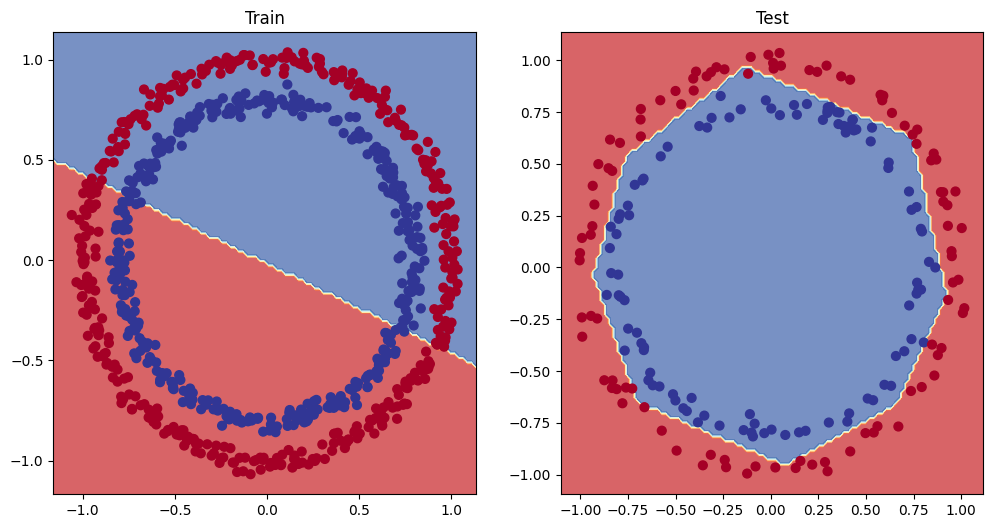

In [ ]:
#plot decision boundies
# Plot decision boundaries for training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

##7.Replicating non-linear activation function
การจำลองฟังก์ชันการเปิดใช้งานแบบไม่เชิงเส้นตรง
neural networks rather then us telling the model what to learn, we givr it the tools to discover patterns in data and patterns on its own.
And these tools are linear & non-linear functions.

โครงข่ายประสาทเทียมแทนที่จะบอกโมเดลว่าจะเรียนรู้อะไร แต่เราให้เครื่องมือในการค้นหารูปแบบในข้อมูลและรูปแบบด้วยตัวมันเอง
และเครื่องมือเหล่านี้เป็นฟังก์ชันเชิงเส้นและไม่ใช่เชิงเส้น

In [6]:
# Create a toy tensor (similar to the data going into our model(s))
import torch
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [8]:
# Visualize the toy tensor
plt.plot(A);

NameError: name 'plt' is not defined

In [ ]:
# Create ReLU function by hand
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

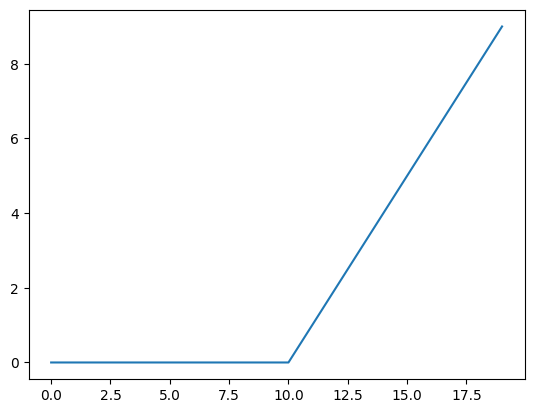

In [ ]:
# Plot ReLU activated toy tensor
plt.plot(relu(A));

In [ ]:
# Create a custom sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# Test custom sigmoid on toy tensor
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

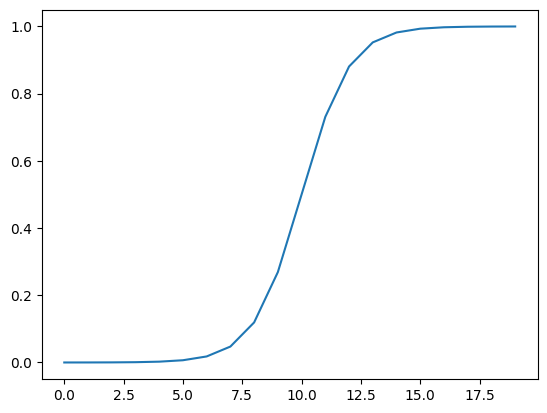

In [ ]:
# Plot sigmoid activated toy tensor
plt.plot(sigmoid(A));

##8.Putting things together by building a multi-class PyTorch model
`binary classification` problem deals with classifying something as one of two options (e.g. a photo as a cat photo or a dog photo)

`multi-class classification` problem deals with classifying something from a list of more than two options (e.g. classifying a photo as a cat a dog or a chicken).
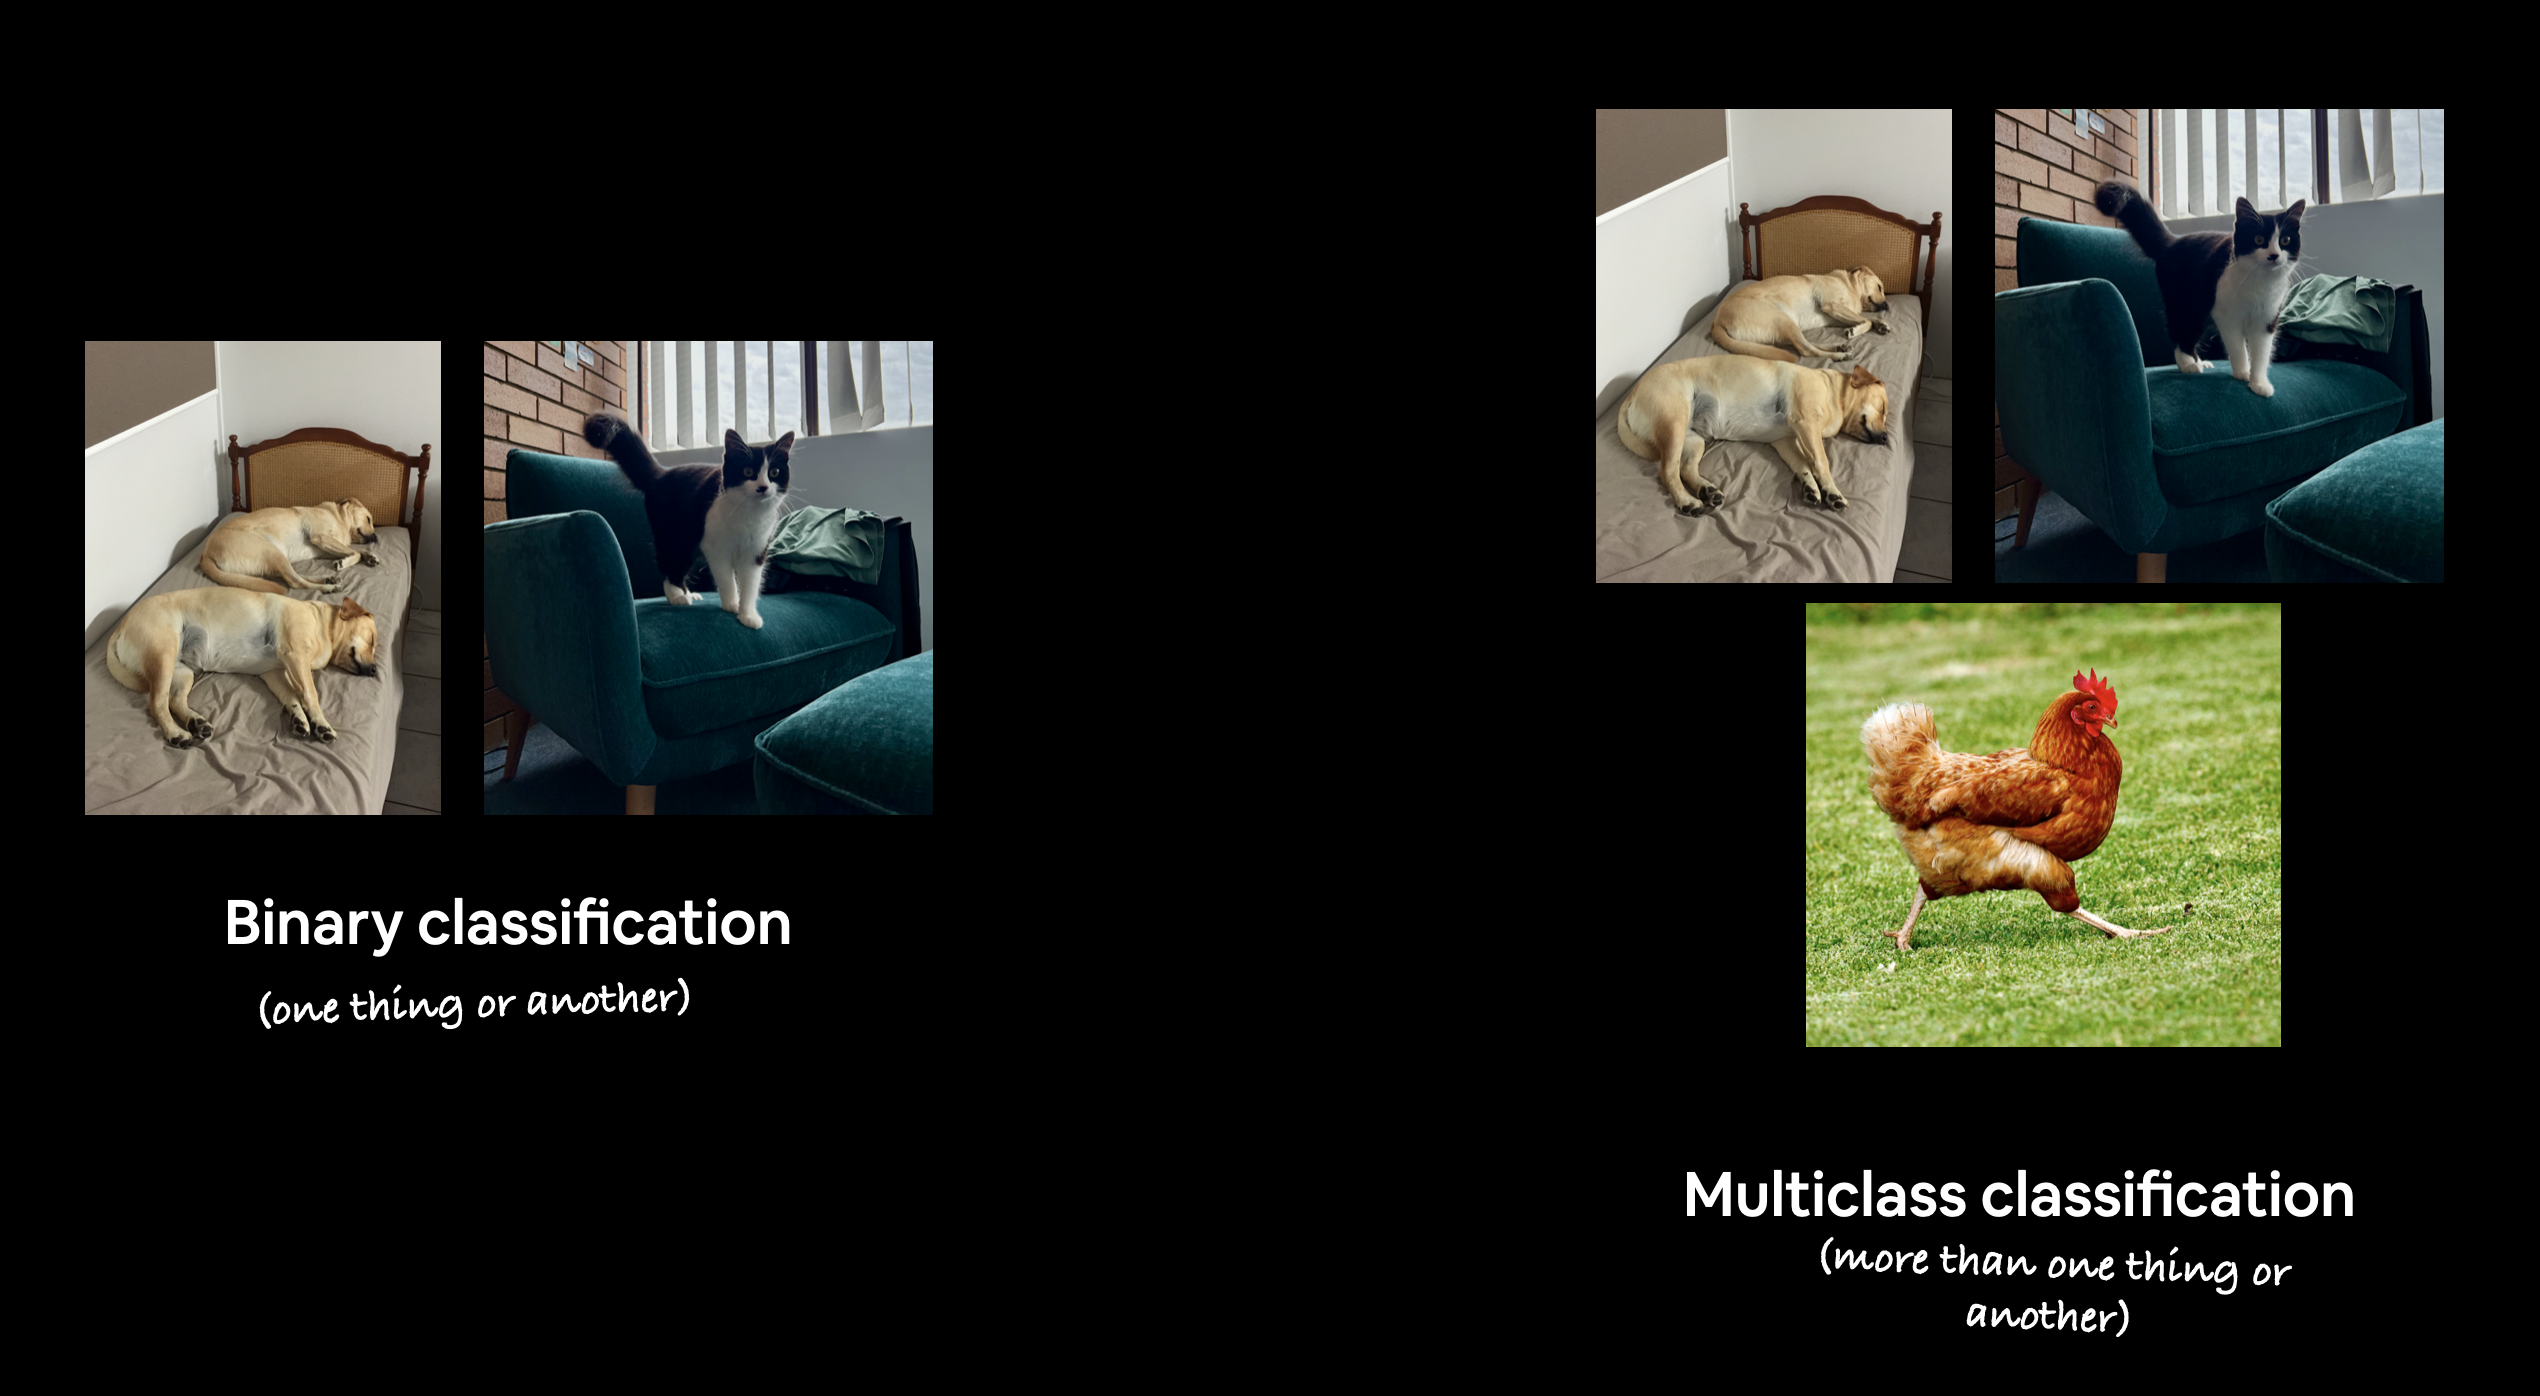

###8.1 Creating mutli-class classification data

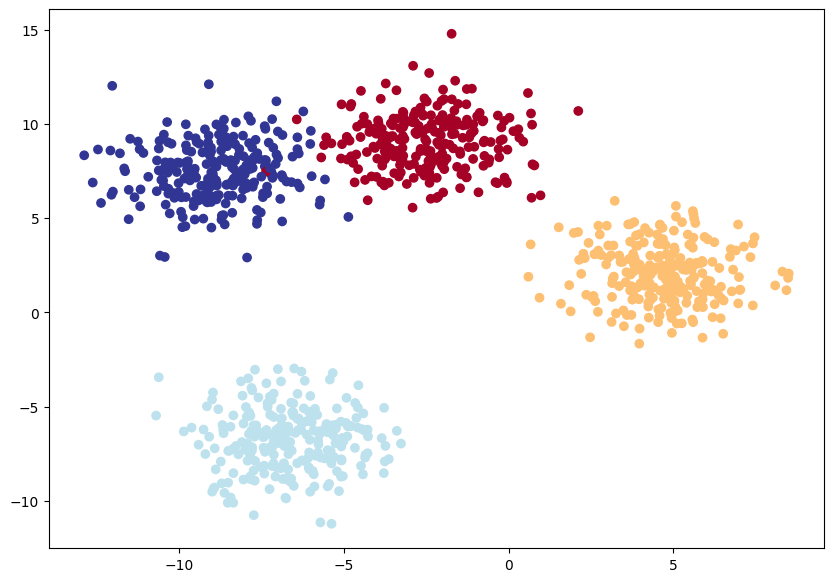

In [ ]:
#import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split
#set the hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
#1 create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, centers=NUM_CLASSES, n_features=NUM_FEATURES,cluster_std = 1.5,
                  random_state=RANDOM_SEED)
# 2. turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob_test = torch.from_numpy(y_blob).type(torch.float)

# 3. split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,#20% test, 80% train
                                                    random_state=RANDOM_SEED)
#plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0] ,X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
X_blob.dtype,y_blob_test.dtype

(torch.float32, dtype('int64'))

###8.2 Building a multi-class classification model in PyTorch

In [ ]:
# Create device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape,y_blob_train.shape[:5]

(torch.Size([800, 2]), (800,))

###8.3 Creating a loss function and optimizer for a multi-class PyTorch model

In [ ]:
#set up loss and optimizer
loss_fn = nn.CrossEntropyLoss()#เนื่องจากชุดข้อมูลแต่ละประเภทของมัลติคลาสมีจำนวนไม่เท่ากันจึงใช้ฟั่งชั้นนี้
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1)


###8.4 Getting prediction probabilities for a multi-class PyTorch mode

model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

In [ ]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

In [ ]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [ ]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.3169, 0.3244, 0.1405, 0.2182], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(1, device='cuda:0')


In [ ]:
y_pred_probs = torch.softmax(model_4(X_blob_test.to(device)), dim=1)
y_pred_probs[:10]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [ ]:
y_preds_test = torch.argmax(X_blob_test, dim=1)
y_preds_test

tensor([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 0])

###8.5 Creating a training and testing loop for a multi-class PyTorch model

In [ ]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
#Fit the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Convert data to tensors if not already
if not torch.is_tensor(X_blob_train):
    X_blob_train = torch.tensor(X_blob_train, dtype=torch.float32)
if not torch.is_tensor(y_blob_train):
    y_blob_train = torch.tensor(y_blob_train, dtype=torch.long)
if not torch.is_tensor(X_blob_test):
    X_blob_test = torch.tensor(X_blob_test, dtype=torch.float32)
if not torch.is_tensor(y_blob_test):
    y_blob_test = torch.tensor(y_blob_test, dtype=torch.long)
# Set the number of epochs
epochs = 100



# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  #Train
  model_4.train()

  y_logits = model_4(X_blob_train)

  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)

  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Test
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)
  #Print out
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.02427, Acc: 99.25% | Test Loss: 0.01335, Test Acc: 99.50%
Epoch: 10 | Loss: 0.02422, Acc: 99.25% | Test Loss: 0.01328, Test Acc: 99.50%
Epoch: 20 | Loss: 0.02416, Acc: 99.25% | Test Loss: 0.01321, Test Acc: 99.50%
Epoch: 30 | Loss: 0.02411, Acc: 99.25% | Test Loss: 0.01314, Test Acc: 99.50%
Epoch: 40 | Loss: 0.02405, Acc: 99.25% | Test Loss: 0.01307, Test Acc: 99.50%
Epoch: 50 | Loss: 0.02400, Acc: 99.25% | Test Loss: 0.01301, Test Acc: 99.50%
Epoch: 60 | Loss: 0.02396, Acc: 99.25% | Test Loss: 0.01293, Test Acc: 99.50%
Epoch: 70 | Loss: 0.02391, Acc: 99.25% | Test Loss: 0.01287, Test Acc: 99.50%
Epoch: 80 | Loss: 0.02386, Acc: 99.25% | Test Loss: 0.01281, Test Acc: 99.50%
Epoch: 90 | Loss: 0.02382, Acc: 99.25% | Test Loss: 0.01274, Test Acc: 99.50%


###8.6 Making and evaluating predictions with a PyTorch multi-class model

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
y_logits[:10]

tensor([[ -1.5057,   9.3722,  -9.6653, -10.7708],
        [ -2.4185,  -8.4323,  -5.4639,   4.7279],
        [ -4.8075,  -5.2072,   4.8341,  -3.8423],
        [ -2.2198,   6.8240,  -5.1070,  -6.2650],
        [  5.8961,  -2.0368, -11.5225,  -8.5752],
        [ -3.0511,  -9.9680,  -6.4416,   5.7421],
        [ -4.2325,  -4.4575,   4.2335,  -3.1958],
        [  5.2802,  -5.8789,  -8.8882,  -4.2516],
        [ -6.1209,  -6.6632,   5.9437,  -4.9277],
        [  5.5780,  -4.4494,  -9.6033,  -5.6710]], device='cuda:0')

In [ ]:
#go from logits - > prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.8870e-05, 9.9998e-01, 5.3964e-09, 1.7864e-09],
        [7.8699e-04, 1.9241e-06, 3.7444e-05, 9.9917e-01],
        [6.4953e-05, 4.3554e-05, 9.9972e-01, 1.7052e-04],
        [1.1811e-04, 9.9987e-01, 6.5823e-06, 2.0675e-06],
        [9.9964e-01, 3.5861e-04, 2.7230e-08, 5.1886e-07],
        [1.5173e-04, 1.5036e-07, 5.1121e-06, 9.9984e-01],
        [2.1031e-04, 1.6792e-04, 9.9903e-01, 5.9305e-04],
        [9.9991e-01, 1.4243e-05, 7.0258e-07, 7.2501e-05],
        [5.7598e-06, 3.3487e-06, 9.9997e-01, 1.8994e-05],
        [9.9994e-01, 4.4170e-05, 2.5517e-07, 1.3019e-05]], device='cuda:0')

In [ ]:
#go from pred_probs - > pred labels
y_preds = y_pred_probs.argmax(dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

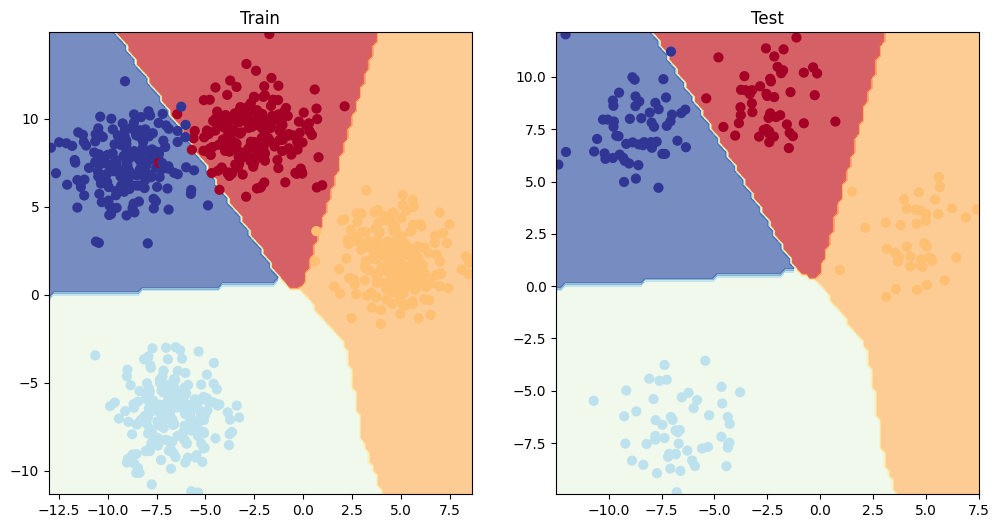

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)